# Logistic map

The logistic map is a one-dimensional discrete time dynamical system that is defined by the equation

$$
x_{n+1} =\lambda x_{n}(1-x_{n})
$$

For an initial value $0\leq x_{0}\leq1$ this map generates a sequence of values $x_{0},x_{1},...x_{n},x_{n+1},...$ The growth parameter is chosen to be

$$
0<\lambda\leq4
$$

which implies that for all  $n$ the state variable will remain bounded in the unit interval. Despite its simplicity this famous dynamical system can exhibit an unbelievable dynamic richness.

In [1]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt

In [2]:
class LogisticMap(bp.dyn.NeuGroup):
  def __init__(self, num, mu0=2., mu1=4.):
    super(LogisticMap, self).__init__(num)

    self.mu = bm.linspace(mu0, mu1, num)
    self.x = bm.Variable(bm.ones(num) * 0.2)

  def update(self, _t, _dt):
    self.x.value = self.mu * self.x * ( 1- self.x)

In [3]:
map = LogisticMap(10000, 2, 4)

In [4]:
runner = bp.dyn.DSRunner(map, monitors=['x'], dt=1)
runner.run(1100)

  0%|          | 0/1100 [00:00<?, ?it/s]

0.10610198974609375

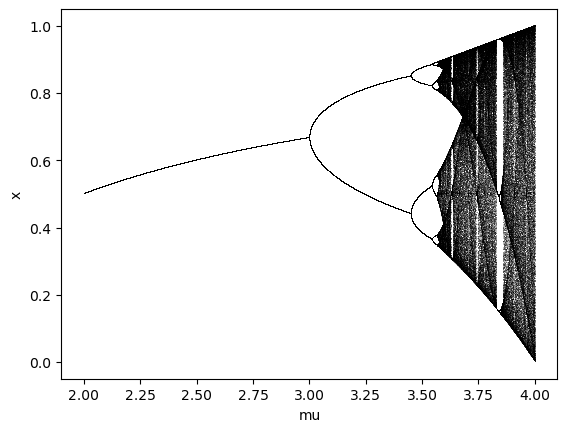

In [5]:
plt.plot(map.mu, runner.mon.x[1000:].T, ',k', alpha=0.25)
plt.xlabel('mu')
plt.ylabel('x')
plt.show()